In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

set_matplotlib_formats('retina')

C:\Users\wlsgh\AppData\Local\Temp/ipykernel_27524/2092777599.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [60]:
df=pd.read_csv('../data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)
df.shape

(91335, 39)

In [61]:
df.describe(include='object')

상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
count   91335  1346     91335    91335     91335    91335     91335    91335   
unique  56910   858         1        1         5        5        34       34   
top        리원  장례식장         S       의료       S01       병원    S02A01       약국   
freq      152    97     91335    91335     60774    60774     18964    18964   

       표준산업분류코드 표준산업분류명  ...   법정동명  대지구분명                  지번주소  \
count     86413   86413  ...  91280  91335                 91335   
unique       15      15  ...   2822      2                 53118   
top      Q86201   일반 의원  ...     중동     대지  서울특별시 동대문구 제기동 965-1   
freq      22555   22555  ...    874  91213                   198   

                   도로명                     건물관리번호    건물명  \
count            91335                      91335  46453   
unique           16610                      54142  17946   
top     서울특별시 강남구 강남대로  1123010300109650001031604  현대아파트   
freq               326                        198    131   

                        도로명주소   동정보    층정보    호정보  
count                   91335  7406  44044  15551  
unique                  54031   556     74    849  
top     서울특별시 동대문구 약령중앙로8길 10     1      1      1  
freq                      198  1571  15994   1286  

[4 rows x 23 columns]

In [62]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [63]:
df['상권업종대분류명'].nunique()

1

In [64]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [65]:
df['상권업종중분류명'].nunique()

5

In [66]:
df['상권업종소분류명']

0           산부인과
1          내과/외과
2           신경외과
3           기타병원
4             약국
          ...   
91330         약국
91331      산후조리원
91332    노인/치매병원
91333        한의원
91334       안과의원
Name: 상권업종소분류명, Length: 91335, dtype: object

In [67]:
df

상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0      19956873        하나산부인과   NaN         S       의료       S01        병원   
1      20024149      타워광명내과의원   NaN         S       의료       S01        병원   
2      20152277     조정현신경외과의원   NaN         S       의료       S01        병원   
3      20350610      한귀원정신과의원   NaN         S       의료       S01        병원   
4      20364049     더블유스토어수지점   수지점         S       의료       S02    약국/한약방   
...         ...           ...   ...       ...      ...       ...       ...   
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0        S01B10     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1        S01B07    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2        S01B15     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   
3        S01B99     기타병원      NaN  ...  2650010400100740001009932      NaN   
4        S02A01       약국   G47811  ...  4146510100107120002026238      NaN   
...         ...      ...      ...  ...                        ...      ...   
91330    S02A01       약국   G47811  ...  3017011200115070000021096      NaN   
91331    S07A07    산후조리원   S96993  ...  4128112300111460000011715    청한프라자   
91332    S01B17  노인/치매병원   Q86102  ...  2641010800105380001005572    한신시티빌   
91333    S01B06      한의원   Q86203  ...  1174010500103450009002392      NaN   
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314      김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0       경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295   
1      서울특별시 강남구 언주로30길 39  135270.0   6292.0  NaN    4  NaN  127.053198   
2        경기도 시흥시 중심상가로 178  429450.0  15066.0  NaN  NaN  NaN  126.734841   
3        부산광역시 수영구 수영로 688  613100.0  48266.0  NaN    5  NaN  129.115438   
4       경기도 용인시 수지구 문정로 32  448170.0  16837.0  NaN    1  NaN  127.095522   
...                    ...       ...      ...  ...  ...  ...         ...   
91330      대전광역시 서구 문예로 67  302831.0  35240.0  NaN  NaN  NaN  127.389865   
91331   경기도 고양시 덕양구 성신로 14  412827.0  10503.0  NaN  NaN  NaN  126.830144   
91332    부산광역시 금정구 금강로 209  609841.0  46294.0  NaN    2  NaN  129.082790   
91333    서울특별시 강동구 천중로 213  134811.0   5303.0  NaN  NaN  NaN  127.143958   
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

              위도  
0      37.336344  
1      37.488742  
2      37.344955  
3      35.166872  
4      37.323528  
...          ...  
91330  36.352728  
91331  37.627530  
91332  35.227138  
91333  37.540993  
91334  36.806640  

[91335 rows x 39 columns]

In [68]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [69]:
df['상권업종소분류명'].nunique()

34

In [70]:
# nunique 대신 len 을 사용할 수도 있다.
len(df["상권업종소분류명"].unique())

34

# 1.11.4 그룹화된 요약값 보기 - value_coutns
    * value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [71]:
city=df['시도명'].value_counts()

In [72]:
# nomalize_True 옵션을 사용하면 비율을 구할 수 있다.
city_normalize=df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

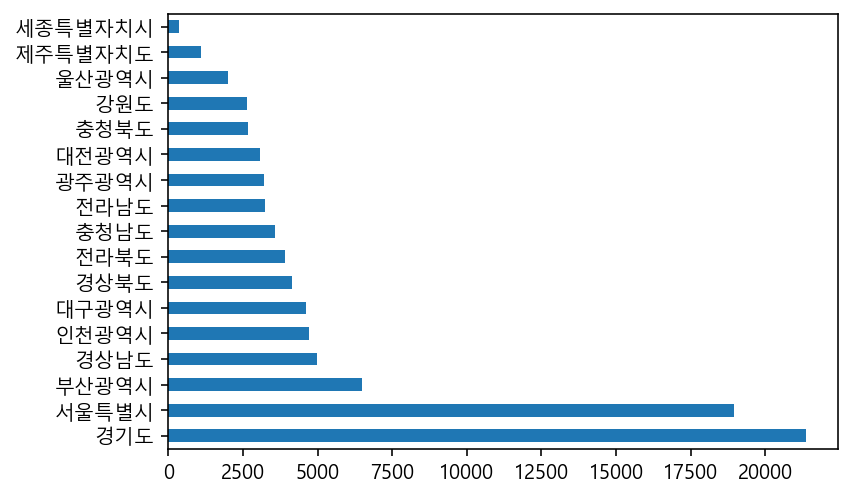

In [73]:
# pandas 에는 plot 기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city.plot.barh()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1666: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='시도명'>

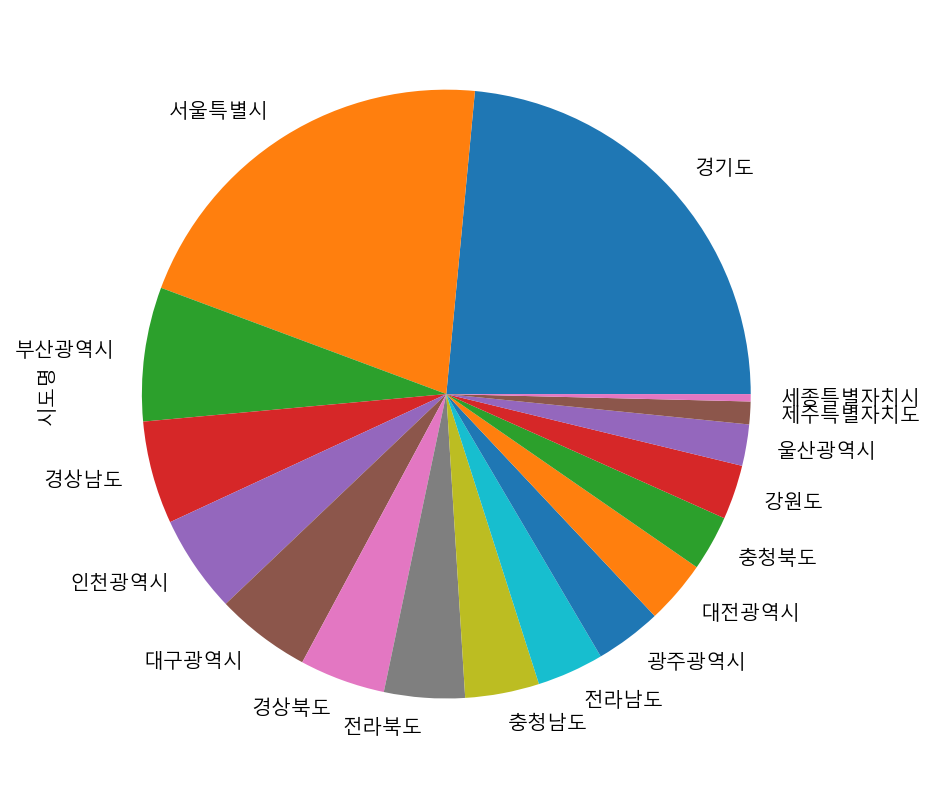

In [74]:
# pandas의 plot.pie()를 사용해서 파이 그래프를 그려봅니다.
city_normalize.plot.pie(figsize=(7,7))

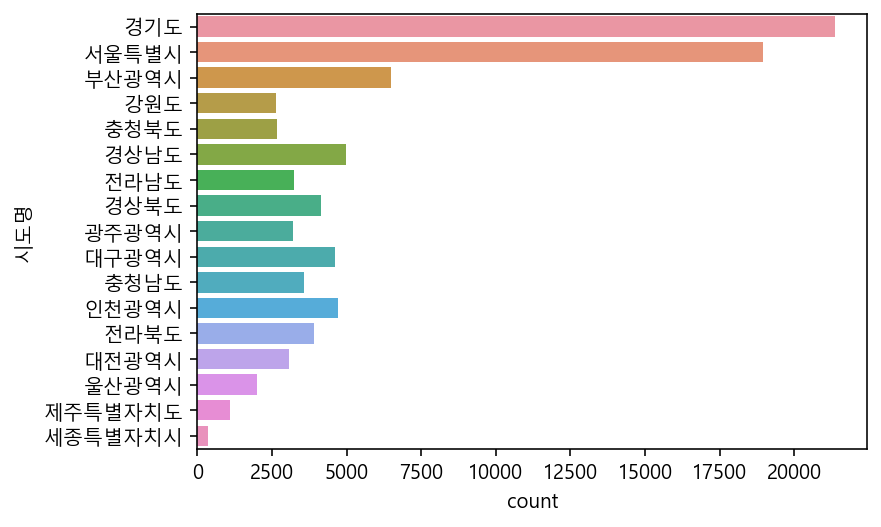

In [75]:
# seaborn 의 countplot 으로 그려 봅니다.
c=sns.countplot(data=df,y='시도명')

In [76]:
# 상권업종대분류명 으로 갯수 세어봅시다
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [77]:
# 중분류명
c=df['상권업종중분류명'].value_counts()

In [78]:
# normalize=True 는 비율 구하기
n=df['상권업종중분류명'].value_counts(normalize=True)

<AxesSubplot:>

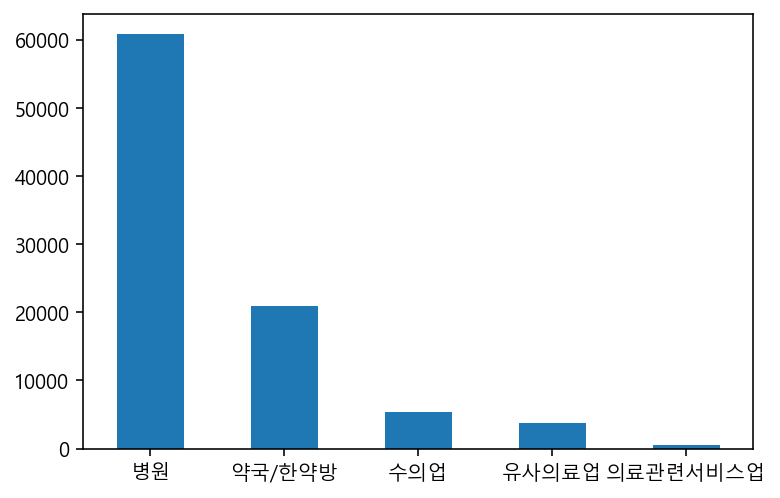

In [79]:
# 판다스의 plot.bar() 막대그래프 쓰기  rot=0 레이블값을 얼마나 회전시킬지
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

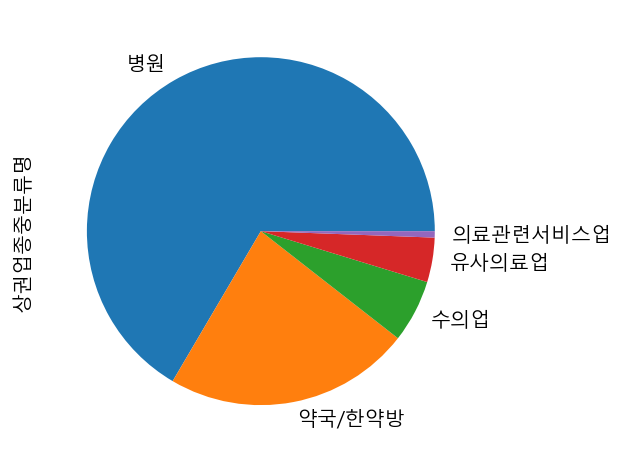

In [80]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
n.plot.pie()

In [81]:
# 상권업종소분류명 에 대한 그룹화 된 값을 카운트 합니다.
c=df['상권업종소분류명'].value_counts()

<AxesSubplot:>

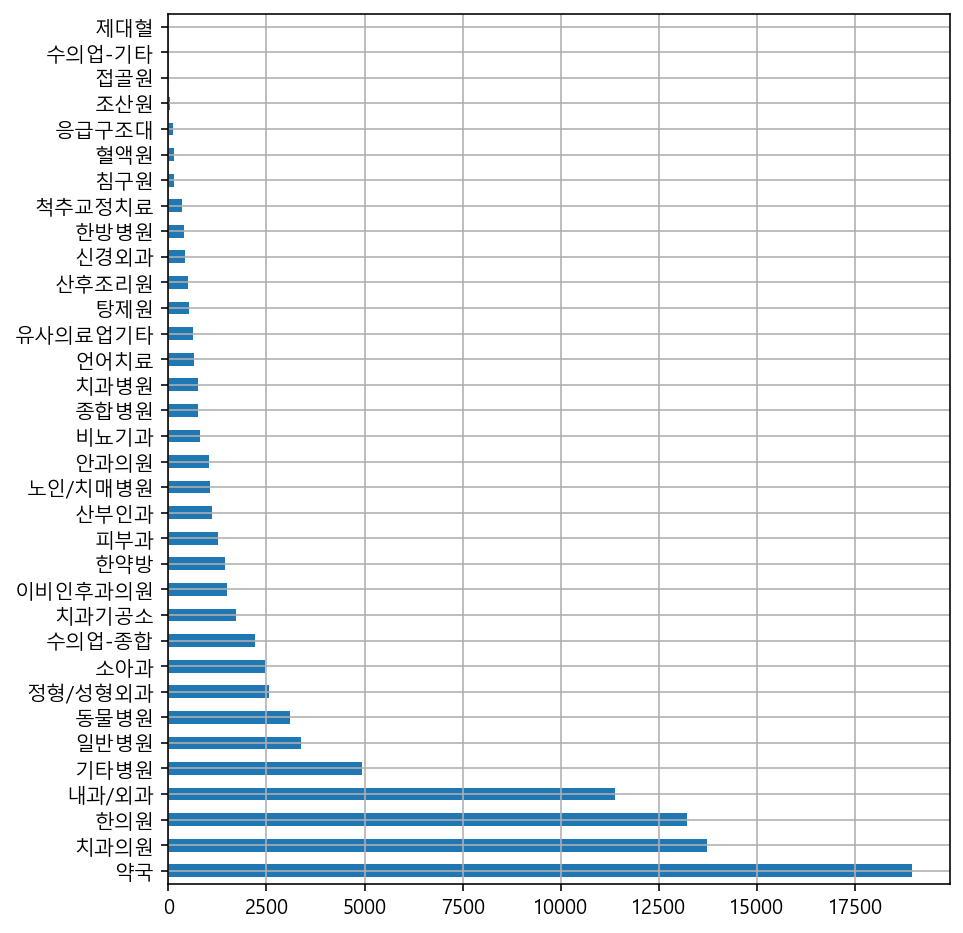

In [82]:
# 상권업종소분류명으로 bar를 사용해서 막대그래프를 그려봅니다. grid는 격자를 생성해준다.
c.plot.barh(figsize=(7,8), grid=True)

# 1.12 데이터 색인하기
    * 특정 데이터만 모아서 따로 봅니다.

In [83]:
# '상권업종중분류명'이 약국/한약방 인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
# copy를 사용하게되면 df_medical(새로운 변수) 를 바꿔도 원래 변수는 바뀌지 않는다. copy를 사용하지 않으면 둘 다 바뀐다.
df_medical=df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(2)


상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   
6  20733252      춘산한약방  NaN         S       의료       S02   약국/한약방    S02A02   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명               도로명주소  \
4       약국   G47811  ...  4146510100107120002026238  NaN  경기도 용인시 수지구 문정로 32   
6      한약방   G47811  ...  4211010500101000000023668  NaN      강원도 춘천시 낙원길 50   

      구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
4  448170.0  16837.0  NaN   1  NaN  127.095522  37.323528  
6  200042.0  24273.0  NaN   2  NaN  127.726905  37.880504  

[2 rows x 39 columns]

In [84]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행, 열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
m=df['상권업종대분류명']== '의료'
df.loc[m,'상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [85]:
# 유사의료업만 따로 모아봅니다.
df_medi=df[df['상권업종중분류명']=='유사의료업']
df_medi.shape

(3774, 39)

In [86]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.
df['상호명'].value_counts().head(10)


리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [87]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에 상효명으로 갯수를 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

# 1.12.1 여러 조건으로 색인하기

In [88]:
1
2
3

3

In [89]:
# '상권업종소분류명'이 '약국'인 것과
# '시도명' 이 "서울특별시"인 데이터만 가져옵니다.
# 소괄호로 안묶어주면 연산자 우선순위 때문에 에러가난다.
df_seoul_drug=df[(df['상권업종소분류명']=="약국") & (df["시도명"]== "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head()


(3579, 39)


상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
33   20816709    이즈타워약  NaN         S       의료       S02   약국/한약방    S02A01   
51   20855710     진흥약국  NaN         S       의료       S02   약국/한약방    S02A01   
130  21589838    신세계약국  NaN         S       의료       S02   약국/한약방    S02A01   
136  22388303  메디팜한솔약국  NaN         S       의료       S02   약국/한약방    S02A01   
141  22412563      명약국  NaN         S       의료       S02   약국/한약방    S02A01   

    상권업종소분류명 표준산업분류코드  ...                     건물관리번호        건물명  \
33        약국   G47811  ...  1168010100108210001000001       이즈타워   
51        약국   G47811  ...  1174010600106090000000001  둔촌푸르지오아파트   
130       약국   G47811  ...  1126010600106460000000300     금강리빙스텔   
136       약국   G47811  ...  1120010700103460012016935     한진노변상가   
141       약국   G47811  ...  1123010900102860121007257        NaN   

                    도로명주소     구우편번호   신우편번호  동정보  층정보  호정보          경도  \
33     서울특별시 강남구 테헤란로 101  135080.0  6134.0  NaN    1  NaN  127.028023   
51      서울특별시 강동구 명일로 172  134767.0  5360.0  NaN  NaN  NaN  127.145055   
130     서울특별시 중랑구 신내로 211  131130.0  2024.0  NaN    1  NaN  127.092597   
136      서울특별시 성동구 행당로 82  133777.0  4717.0  NaN    1  NaN  127.027513   
141  서울특별시 동대문구 망우로18나길 3  130090.0  2498.0  NaN    1  NaN  127.060556   

            위도  
33   37.498656  
51   37.534135  
130  37.616424  
136  37.556238  
141  37.587349  

[5 rows x 39 columns]

# 1.12.2 구별로 보기

In [90]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다,
c= df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [91]:
# normalize=True 를 통해 비율을 구해봅시다.
n=df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

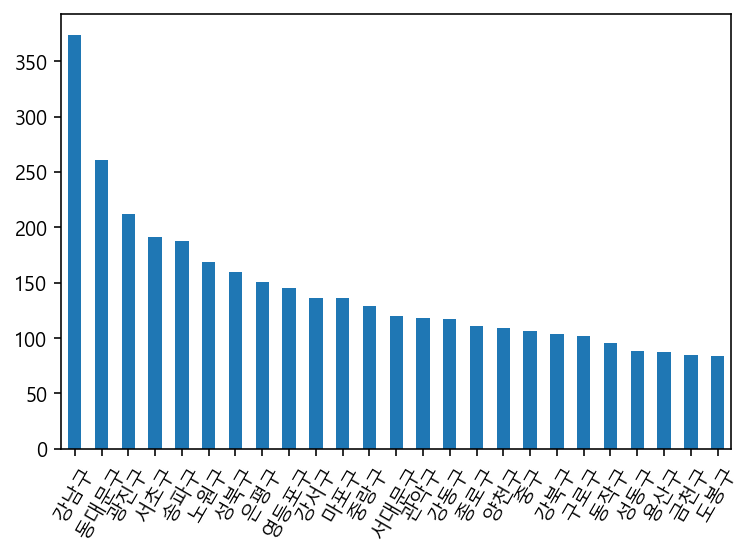

In [92]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
c.plot.bar(rot=60)

In [93]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시" 인 데이터만 가져옵니다.
# 결과를 df_seoul_hospital 에 할당해서 재사용합니다.
df_seoul_hospital=df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"]== "서울특별시")].copy()
df_seoul_hospital


상가업소번호               상호명     지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
305    25155642            대진의료재단     NaN         S       의료       S01   
353    20471487            홍익병원별관     NaN         S       의료       S01   
385    20737057              SNUH     NaN         S       의료       S01   
1917   23210677  평화드림여의도성모병원의료기매장     NaN         S       의료       S01   
2461   20024045                한양     NaN         S       의료       S01   
...         ...               ...     ...       ...      ...       ...   
71991  28505952      서울성모병원응급의료센터  응급의료센터         S       의료       S01   
76508  12292992             라마르의원     NaN         S       의료       S01   
90492  16031909     가톨릭대학교여의도성모병원     NaN         S       의료       S01   
90581  16332576              씨엠병원     NaN         S       의료       S01   
90788  16162338            성베드로병원     NaN         S       의료       S01   

      상권업종중분류명 상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
305         병원    S01B01     종합병원   Q86101  ...  1121510100100580025000733   
353         병원    S01B01     종합병원   Q86101  ...  1147010100108970013001044   
385         병원    S01B01     종합병원   Q86101  ...  1168010100107360055027688   
1917        병원    S01B01     종합병원   Q86101  ...  1156011000100620000031477   
2461        병원    S01B01     종합병원   Q86101  ...  1120010700100150001019623   
...        ...       ...      ...      ...  ...                        ...   
71991       병원    S01B01     종합병원   Q86101  ...  1165010700101230000017226   
76508       병원    S01B01     종합병원   Q86101  ...  1174010900104530021010314   
90492       병원    S01B01     종합병원   Q86101  ...  1114012700100010001019574   
90581       병원    S01B01     종합병원   Q86101  ...  1156010500100900000035097   
90788       병원    S01B01     종합병원   Q86101  ...  1168011800109100027000895   

              건물명                  도로명주소     구우편번호   신우편번호  동정보  층정보  호정보  \
305     재단법인대순진리회     서울특별시 광진구 긴고랑로 119  143220.0  4944.0  NaN  NaN  NaN   
353        홍익병원별관     서울특별시 양천구 국회대로 250  158070.0  7937.0  NaN    1  NaN   
385          성보빌딩   서울특별시 강남구 테헤란로26길 10  135080.0  6236.0  NaN    4  NaN   
1917      여의도성모병원      서울특별시 영등포구 63로 10  150713.0  7345.0  NaN    1  NaN   
2461       한대동문회관     서울특별시 성동구 마조로 22-2  133070.0  4763.0  NaN    4  NaN   
...           ...                    ...       ...     ...  ...  ...  ...   
71991  가톨릭대학교성의교정     서울특별시 서초구 반포대로 222  137701.0  6591.0  NaN    1  NaN   
76508        원방빌딩  서울특별시 강동구 천호대로157길 18  134864.0  5335.0  NaN  NaN  NaN   
90492        명동성당        서울특별시 중구 명동길 74  100809.0  4537.0  NaN  NaN  NaN   
90581        충무병원  서울특별시 영등포구 영등포로36길 13  150030.0  7301.0  NaN  NaN  NaN   
90788       베드로병원   서울특별시 강남구 남부순환로 2649  135859.0  6271.0  NaN  NaN  NaN   

               경도         위도  
305    127.088279  37.559048  
353    126.862805  37.529213  
385    127.035825  37.499630  
1917   126.936693  37.518296  
2461   127.041325  37.559469  
...           ...        ...  
71991  127.005841  37.502382  
76508  127.127466  37.538485  
90492  126.986758  37.563662  
90581  126.903857  37.518807  
90788  127.039567  37.485604  

[91 rows x 39 columns]

In [94]:
# "시군구명"으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

# 1.12.3 텍스트 데이터 색인하기

In [95]:
# 색인하기 전에 상효명 중에 종합병원이 아닌 데이터를 찾아봅니다.
# ~를 사용하면 아닌것들만 가져올 수 있다.
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [96]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
2803  20895655  서울성모병원장례식장꽃배달  NaN         S       의료       S01       병원   
4644  22020310  강남성모병원장례식장꽃배달  NaN         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
2803    S01B01     종합병원   Q86101  ...  1165010700105510000017194   NaN   
4644    S01B01     종합병원   Q86101  ...  1165010700105470006016762  이이빌딩   

                        도로명주소     구우편번호   신우편번호  동정보 층정보  호정보          경도  \
2803     서울특별시 서초구 사평대로28길 55  137040.0  6578.0    1   1  NaN  127.000682   
4644  서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  NaN   1  NaN  127.001756   

             위도  
2803  37.498257  
4644  37.499095  

[2 rows x 39 columns]

In [97]:
# "꽃배달|의료기|장례식장|상담소|어린이집" 은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한 번에 검색합니다.
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 변환합니다.
drop_row=df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row= drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [98]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list 형태로 변환합니다.
drop_row2=df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2=drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [99]:
# 삭제할 행을 drop_row에 합쳐줍니다.
drop_row=drop_row + drop_row2
len(drop_row)


33

In [100]:
drop_row

[1917,
 2803,
 4431,
 4644,
 7938,
 10283,
 47008,
 60645,
 70177,
 8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [101]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교합니다.
df_seoul_hospital=df_seoul_hospital.drop(drop_row,axis=0)
df_seoul_hospital


상가업소번호              상호명     지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
305    25155642           대진의료재단     NaN         S       의료       S01   
353    20471487           홍익병원별관     NaN         S       의료       S01   
385    20737057             SNUH     NaN         S       의료       S01   
2461   20024045               한양     NaN         S       의료       S01   
2687   20890249       백산의료재단친구병원     NaN         S       의료       S01   
2801   20867576           서울보훈병원     NaN         S       의료       S01   
4285   21914819          서울대학교병원    강남센터         S       의료       S01   
4856   22256379             제일병원     NaN         S       의료       S01   
5005   22439143           이랜드클리닉     NaN         S       의료       S01   
5089   22470053         사랑나눔의료재단     NaN         S       의료       S01   
5759   23913570            우울증센터     NaN         S       의료       S01   
5824   24720669           성심의료재단     NaN         S       의료       S01   
5867   24422372           다나의료재단     NaN         S       의료       S01   
6978    5920343         서울아산병원신관     NaN         S       의료       S01   
8706   21736553        고려대학교구로병원     NaN         S       의료       S01   
9529   24828735         학교법인일송학원     NaN         S       의료       S01   
10937  25370236   희명스포츠의학센터인공신장실     NaN         S       의료       S01   
10958  24648465  연세대학교의과대학강남세브란스     NaN         S       의료       S01   
11314  23073664           국립정신병원     NaN         S       의료       S01   
11834  21042961            코아클리닉     NaN         S       의료       S01   
14133  25257076     한국전력공사부속한일병원     NaN         S       의료       S01   
14928  21943900           신촌연세병원     NaN         S       의료       S01   
15521  20384548         영동세브란스병원     NaN         S       의료       S01   
16678  24625566      삼성의료재단강북삼성태     NaN         S       의료       S01   
16844  20815937        서울시립보라매병원     NaN         S       의료       S01   
18818  26233200    서울대학교병원비상계획외래     NaN         S       의료       S01   
19102  25990790     평화드림서울성모병원의료     NaN         S       의료       S01   
19438  20471866             홍익병원     NaN         S       의료       S01   
19576  26351584        사랑나눔의료재단서     NaN         S       의료       S01   
21391  22387397            우신향병원     NaN         S       의료       S01   
23422   8810415           동부제일병원     NaN         S       의료       S01   
24375  25250287         아산재단금강병원     NaN         S       의료       S01   
25858  22490334           명곡안연구소     NaN         S       의료       S01   
25917  25314968       아산재단서울중앙병원     NaN         S       의료       S01   
26291  24993083          메디힐특수여객     NaN         S       의료       S01   
27751  24063170      삼성생명공익재단삼성서     NaN         S       의료       S01   
28248  24670818        성광의료재단차병원     NaN         S       의료       S01   
28262  24266526      한국건강관리협회서울특     NaN         S       의료       S01   
28539  24055367     정해복지부설한신메디피아     NaN         S       의료       S01   
28997  22059593           성베드로병원     NaN         S       의료       S01   
30648  24628961           성애의료재단     NaN         S       의료       S01   
30919  24519999         Y&T성모마취과     NaN         S       의료       S01   
40342  23716416           영남의료재단     NaN         S       의료       S01   
43078  20519650       인제대학교서울백병원     NaN         S       의료       S01   
44681  22622193          한국필의료재단     NaN         S       의료       S01   
49667  22568472            사랑의병원     NaN         S       의료       S01   
50174  24577400     성삼의료재단미즈메디병원     NaN         S       의료       S01   
51167  24453173           씨엠충무병원     NaN         S       의료       S01   
54845  22399983       원진재단부설녹색병원     NaN         S       의료       S01   
56967  22485607          강남센트럴병원     NaN         S       의료       S01   
59916  20747548            우리들병원     NaN         S       의료       S01   
61398   8783414          건국대학교병원     NaN         S       의료       S01   
61757   8607388          서울적십자병원    장례식장         S       의료       S01   
71036  26515058             홍익병원     응급실         S       의료       S

<AxesSubplot:>

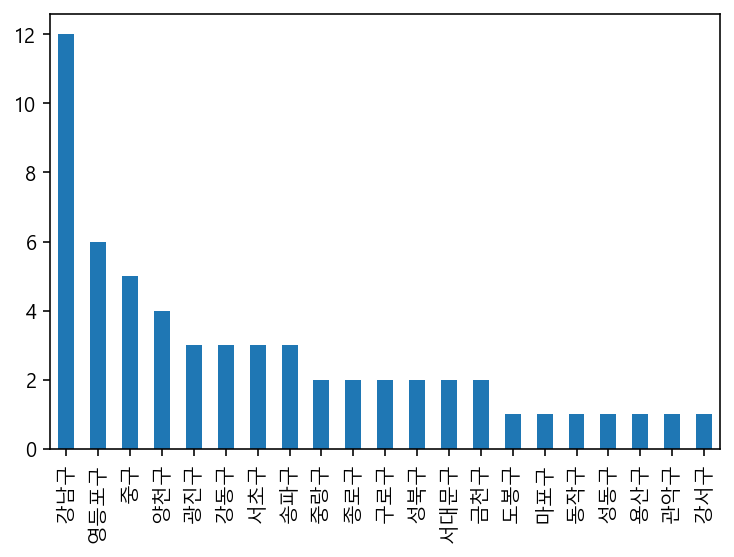

In [102]:
# "시군구명"에 따라 종합병원의 숫자를 countplot으로 그립니다.
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

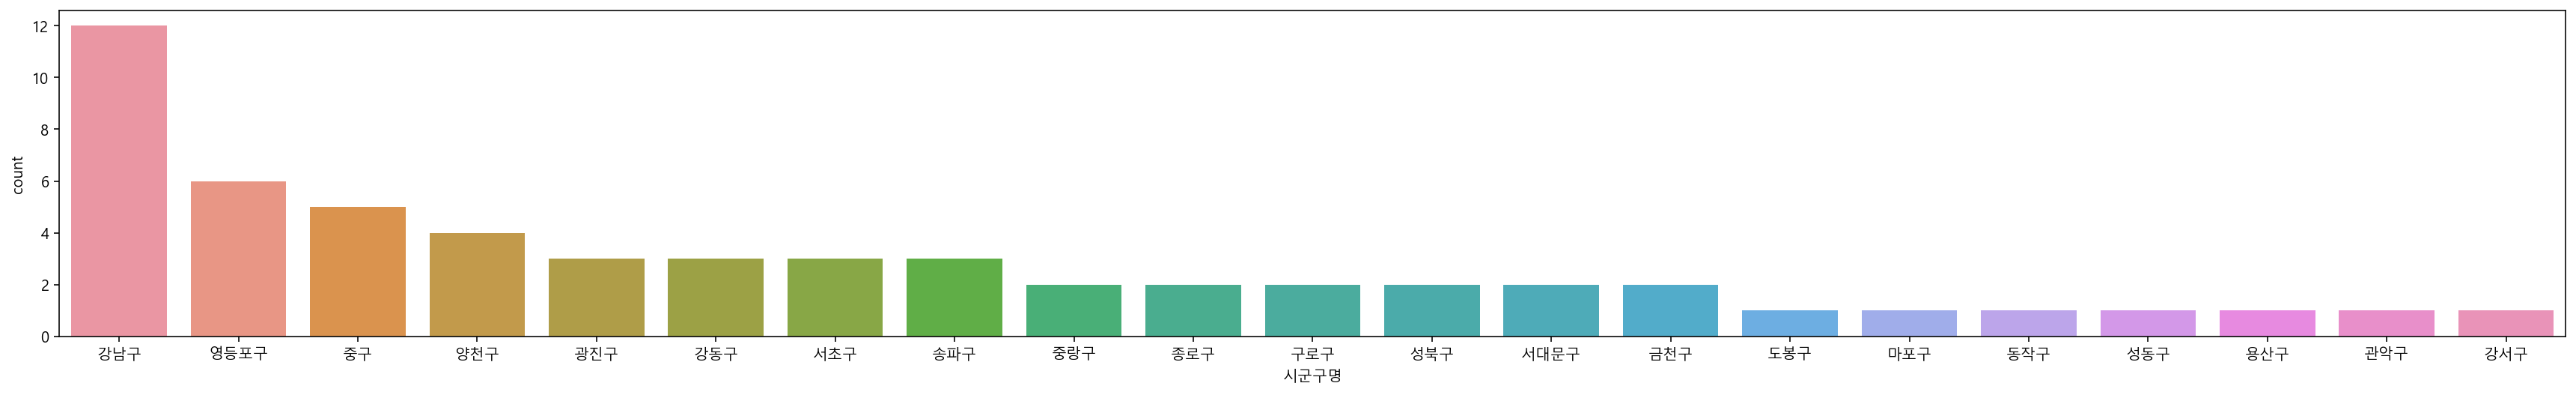

In [103]:
plt.figure(figsize=(30,4))
sns.countplot(data=df_seoul_hospital, x="시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [104]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

# 1.12.4 특정 지역만 보기

In [105]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.

df_seoul=df[df["시도명"]=="서울특별시"].copy()
df_seoul.shape

(18943, 39)

<AxesSubplot:>

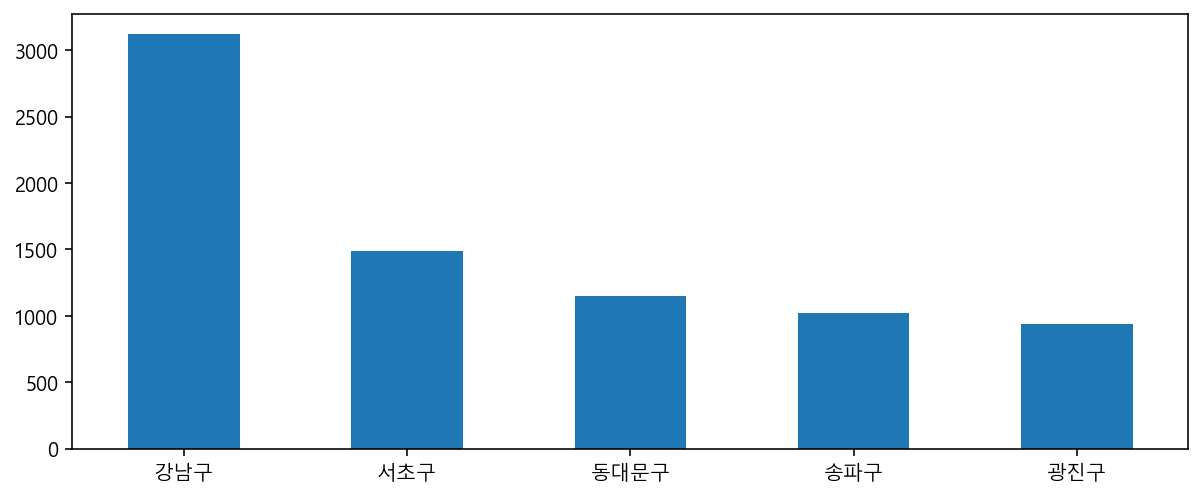

In [106]:
# seaborn 의 countplot을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
df_seoul["시군구명"].value_counts().head().plot.bar(figsize=(10,4), rot=0)



<AxesSubplot:xlabel='시군구명', ylabel='count'>

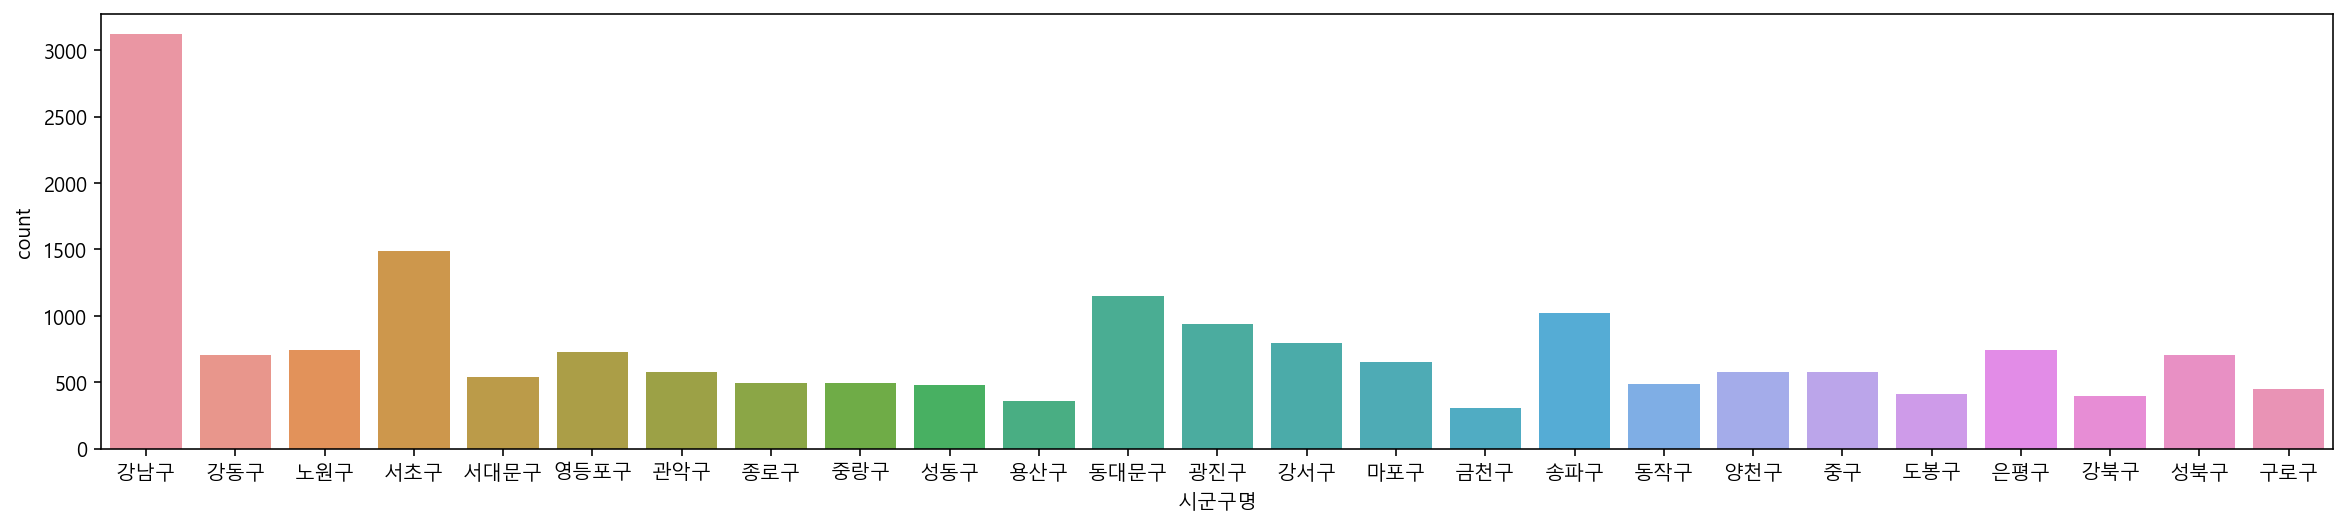

In [107]:
# 시군구명을 seaborn의 countplot으로 그립니다.
plt.figure(figsize=(20,4))
sns.countplot(data=df_seoul, x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

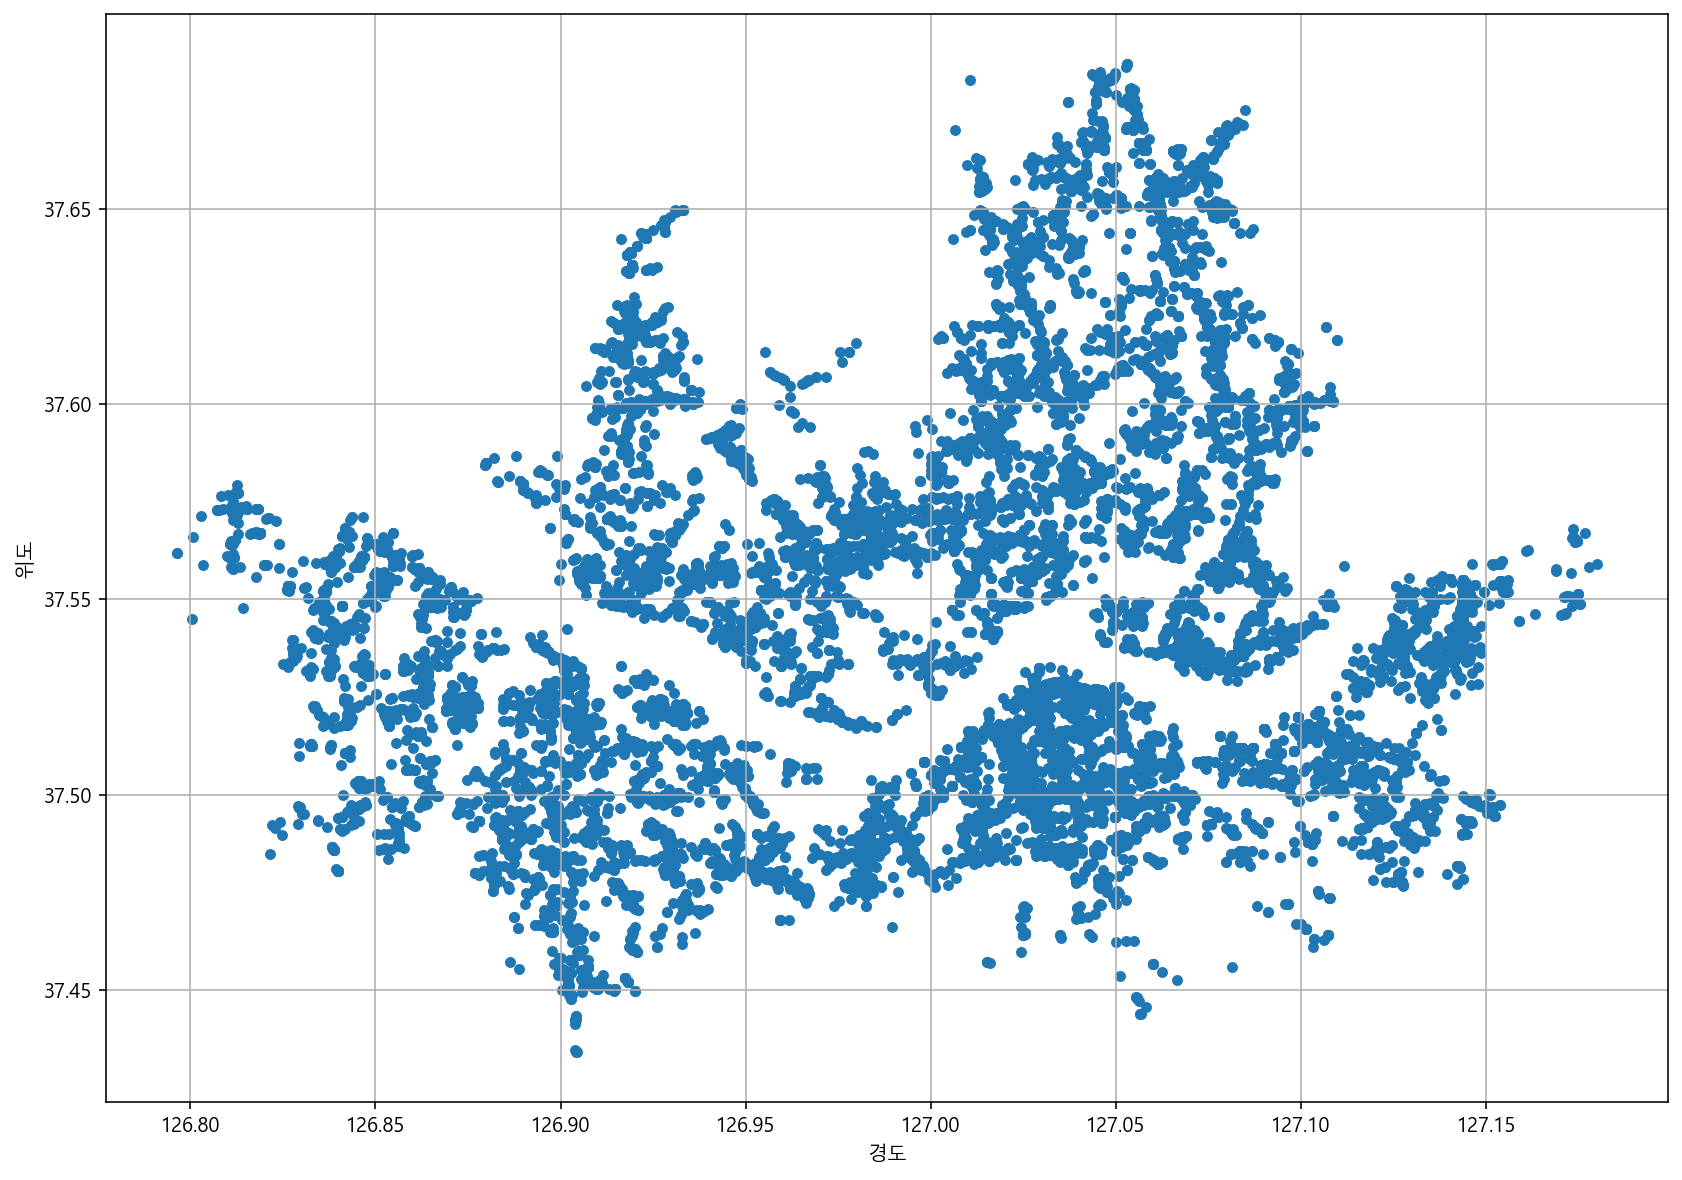

In [108]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도", y="위도", figsize=(14,10), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

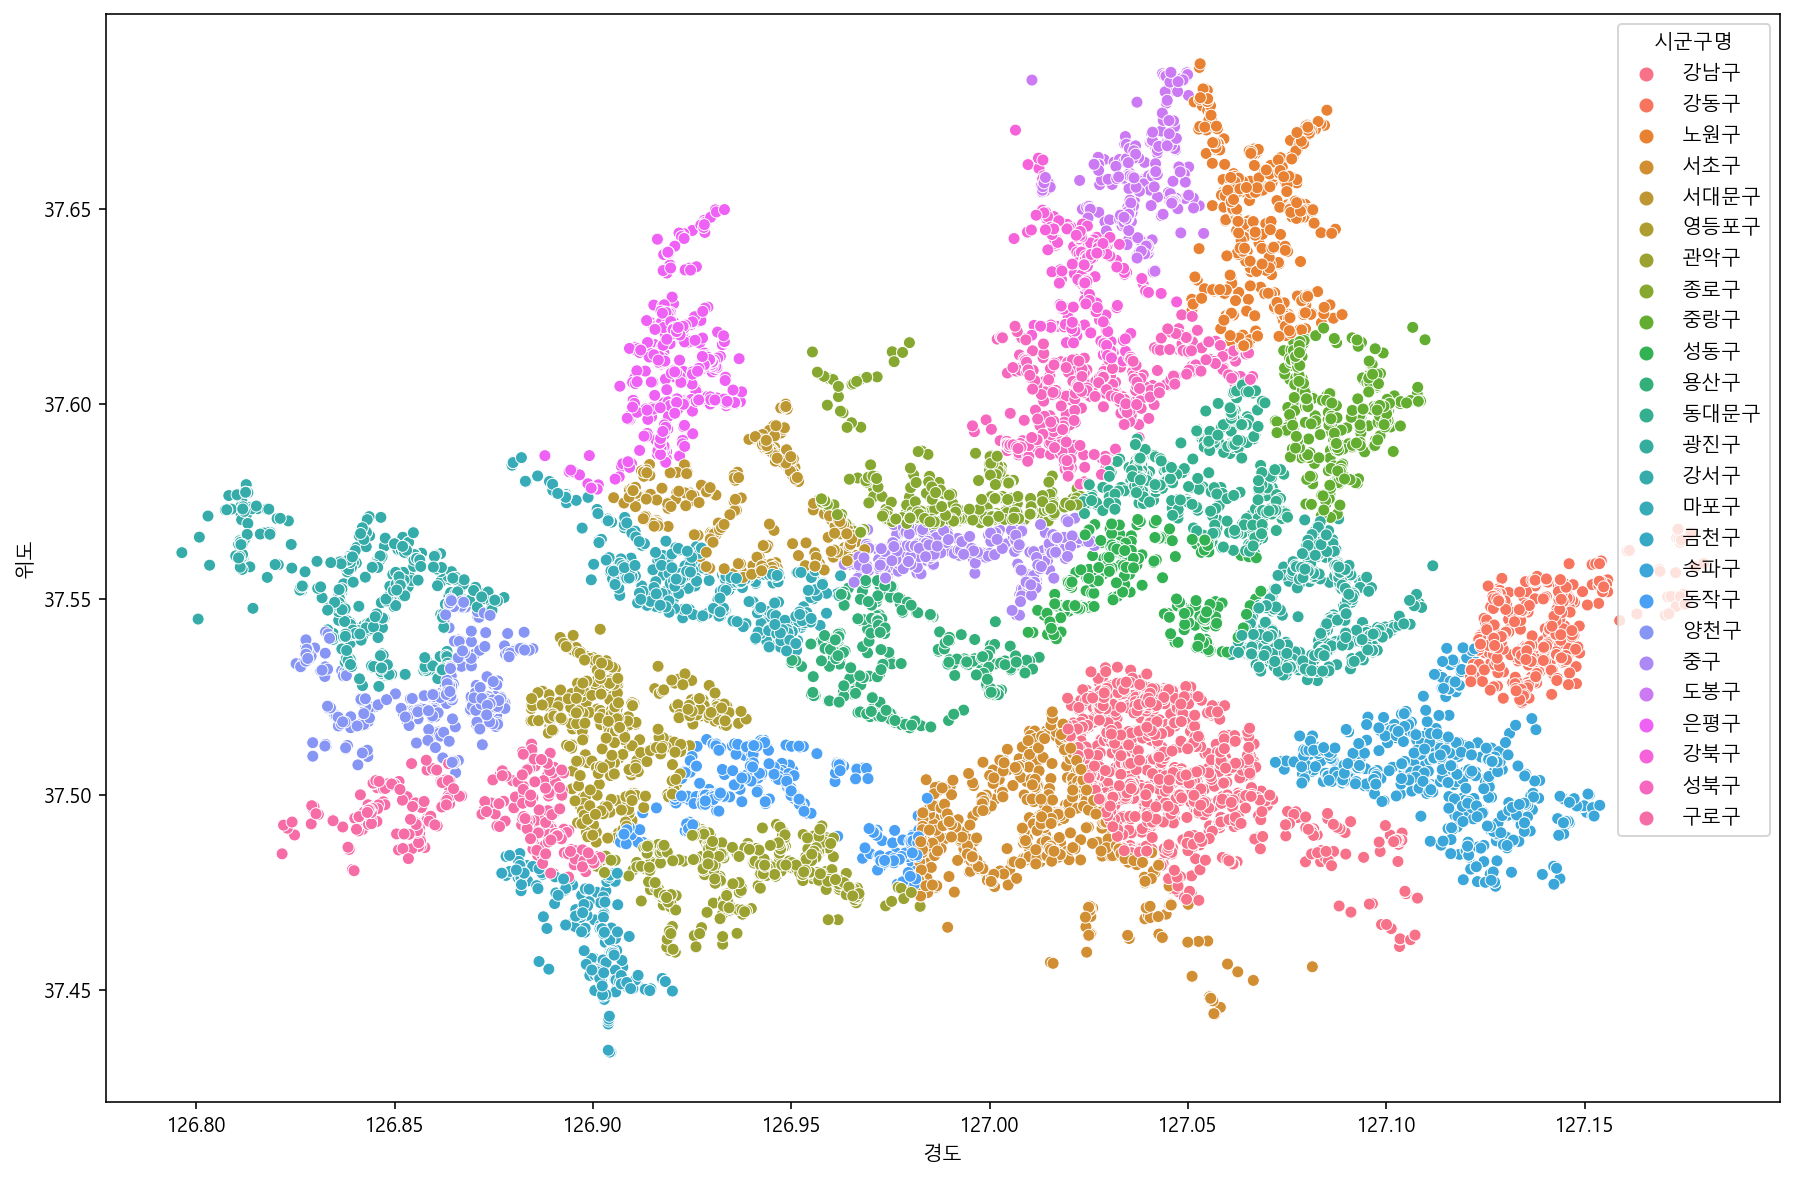

In [109]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

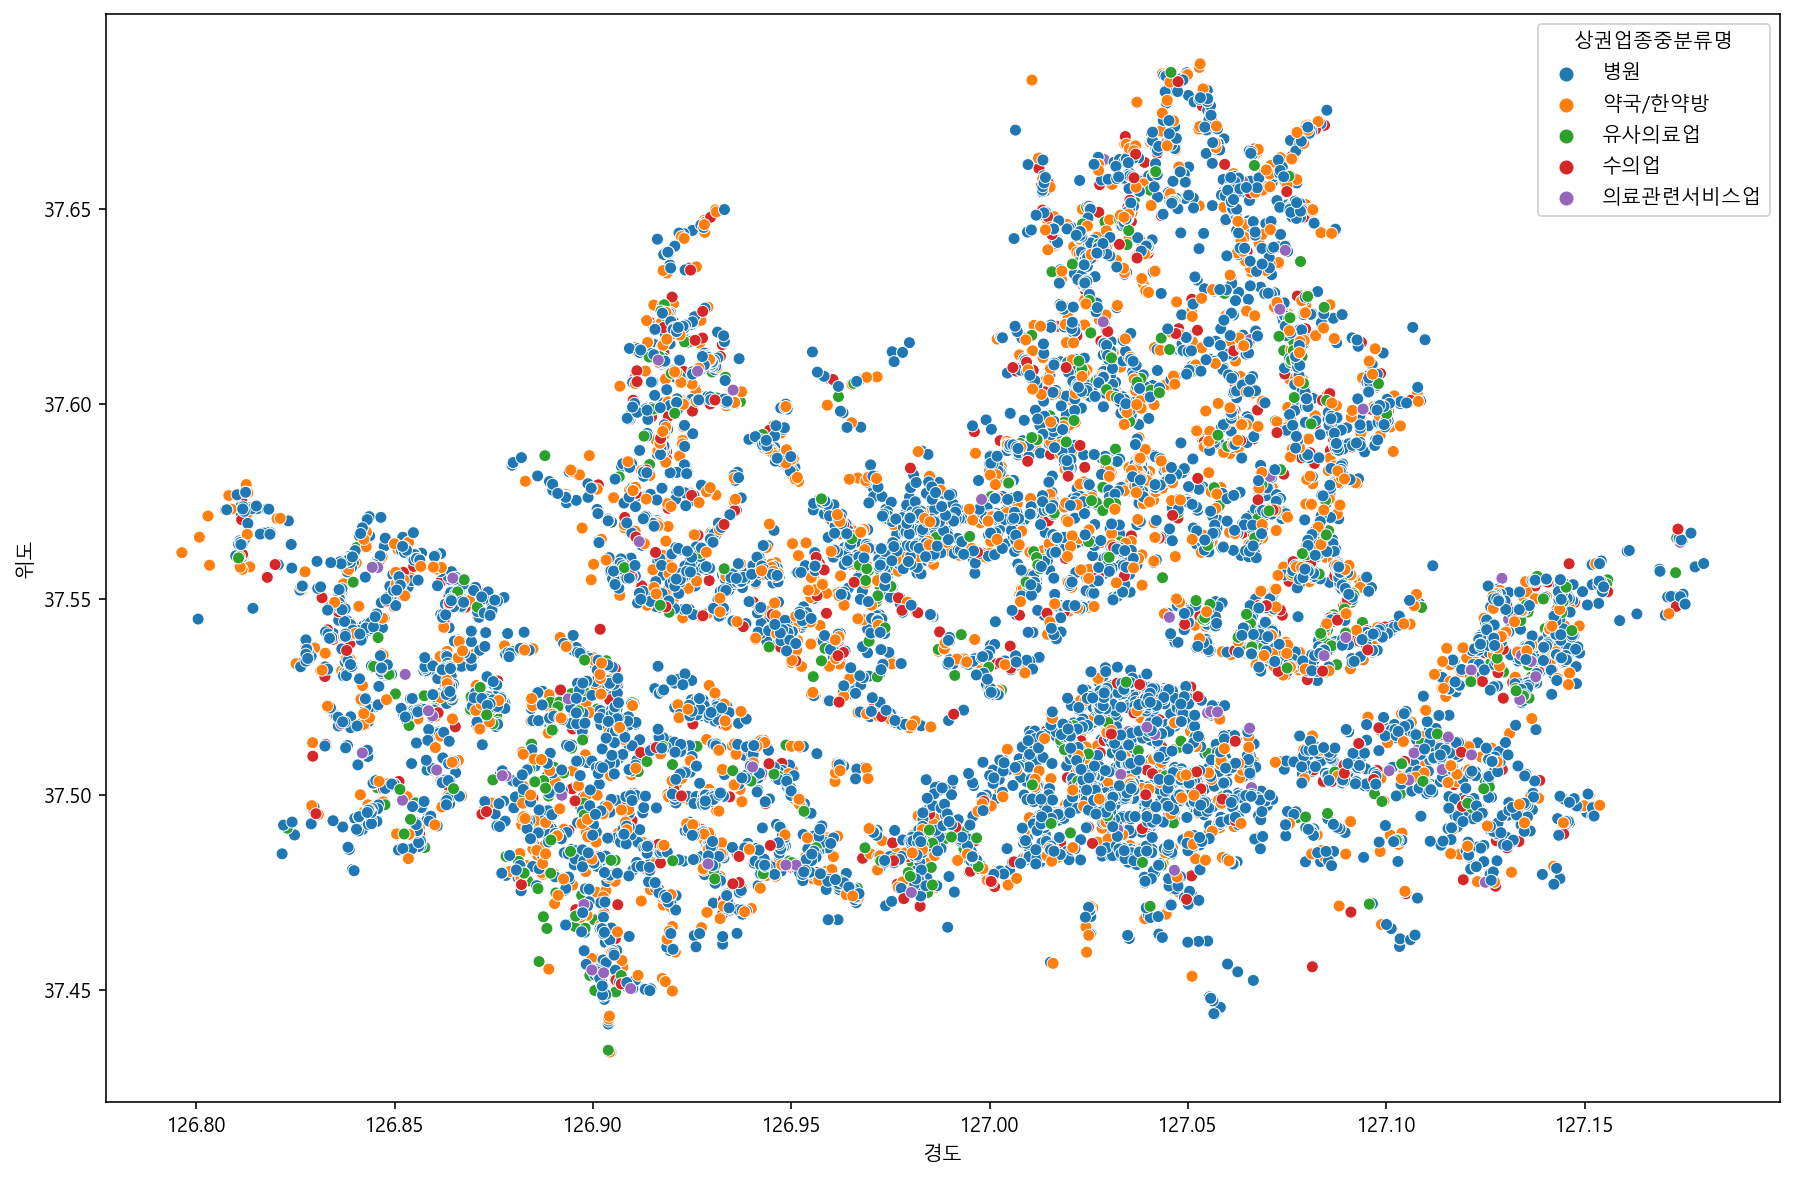

In [110]:
# seaborn의 scatterplot을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

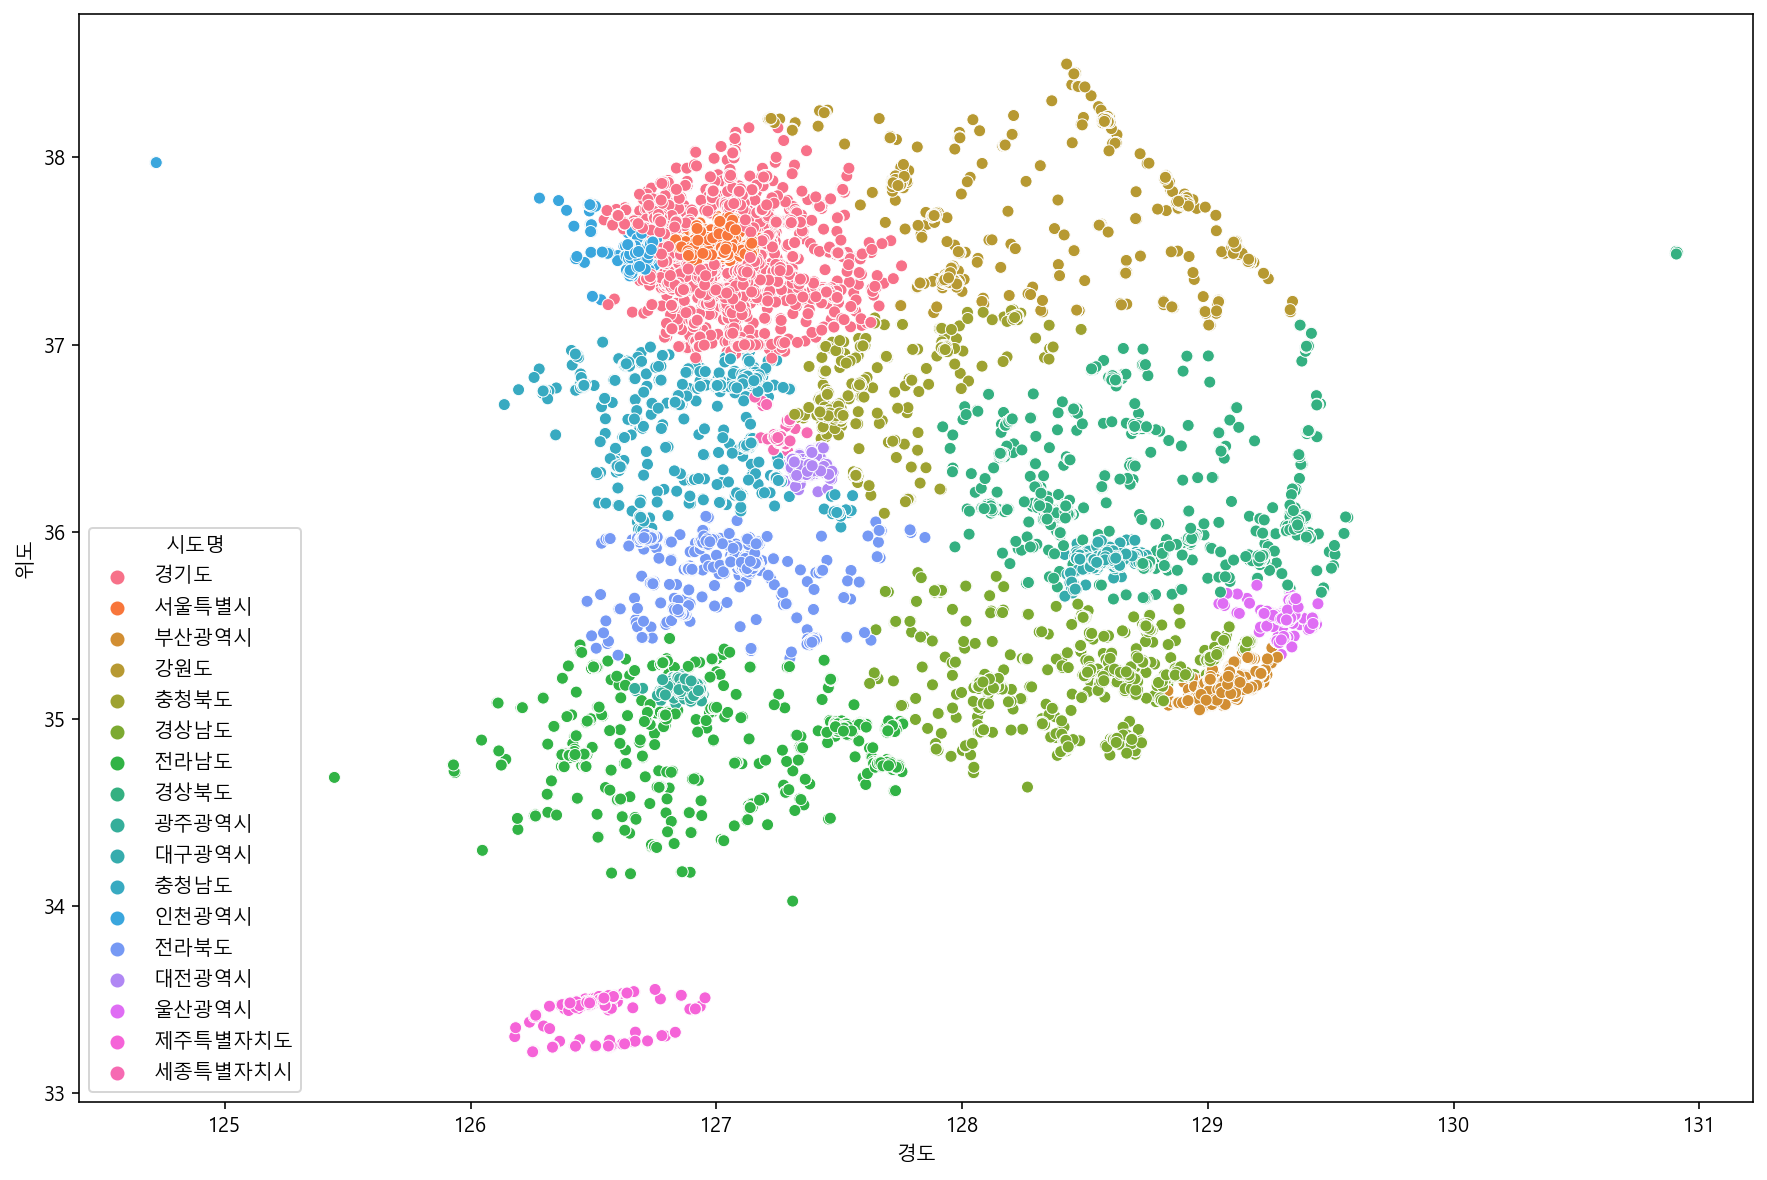

In [111]:
# seaborn의 scatterplot을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다,
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

# 1.13 Folium 으로 지도 활용하기
    다음의 프롬프트 창을 열어 conda 명령어로 설치합니다
        Anaconda Prompt 오픈

    conda install -c conda-forge folium

In [112]:
import folium
folium.Map(location= [120, 38])

In [113]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589356625

In [114]:
df_seoul_hospital.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단  NaN         S       의료       S01       병원    S01B01   

    상권업종소분류명 표준산업분류코드  ...                     건물관리번호        건물명  \
305     종합병원   Q86101  ...  1121510100100580025000733  재단법인대순진리회   

                  도로명주소     구우편번호   신우편번호  동정보  층정보  호정보          경도  \
305  서울특별시 광진구 긴고랑로 119  143220.0  4944.0  NaN  NaN  NaN  127.088279   

            위도  
305  37.559048  

[1 rows x 39 columns]

In [115]:
map=folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()], zoom_start=12)
for n in df_seoul_hospital.index:
    name= df_seoul_hospital.loc[n,"상호명"]
    address= df_seoul_hospital.loc[n,"도로명주소"]
    popup= f"{name} - {address}"
    location=[df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location=location,
        popup=popup,
        
    ).add_to(map)
map
    

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드